In [138]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer = pd.read_csv('customer_data.csv')
customer.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


In [3]:
internet = pd.read_csv('internet_data.csv')
internet.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No


In [4]:
churn = pd.read_csv('churn_data.csv')
churn.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No


#### Combining all the dataframes on the common column -> customerID

In [5]:
df1 = pd.merge(churn, customer, how= 'inner', on= 'customerID')

In [6]:
telecom = pd.merge(df1, internet, how= 'inner', on= 'customerID')

In [7]:
telecom.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No


#### Understanding the data

In [8]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [10]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [11]:
telecom['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [12]:
telecom['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [13]:
telecom['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [14]:
telecom['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [15]:
telecom['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [16]:
telecom['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [17]:
telecom['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [18]:
telecom['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [19]:
telecom['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [20]:
telecom['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [21]:
telecom['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [22]:
telecom['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [23]:
telecom['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [24]:
telecom['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [25]:
telecom['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [26]:
telecom['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [27]:
telecom['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [28]:
telecom['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

- Observation from above:
    - Yes/no/no internet service = ['TechSupport', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'MultipleLines']
    - Yes/no = ['PhoneService', 'Partner', 'PaperlessBilling']
    - Male/Female = ['gender']
    - Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic) = ['PaymentMethod']
    - Month-to-month/Two year/One year = ['Contract']
    - Fiber optic/DSL/No = ['InternetService']

In [29]:
for i in telecom.columns:
    if pd.api.types.is_integer_dtype(telecom[i]) or pd.api.types.is_float_dtype(telecom[i]):
        print(i)

tenure
MonthlyCharges
SeniorCitizen


#### Data Transformation

In [30]:
def obj(x):
    return x.map({'Yes': 1, 'No': 0})

x = ['PhoneService', 'Partner', 'PaperlessBilling', 'Dependents', 'Churn']
telecom[x] = telecom[x].apply(obj)

In [31]:
def obj1(x):
    return x.map({'Male': 1, 'Female': 0})

telecom['gender'] = telecom[['gender']].apply(obj1)

In [32]:
# Now time for dummy encoding

y = ['TechSupport', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'MultipleLines', 'PaymentMethod', 'Contract', 'InternetService', 'DeviceProtection']

categorical = pd.get_dummies(telecom[y], dtype=int, drop_first=True)

In [33]:
categorical.shape

(7043, 21)

In [34]:
telecom_data = pd.concat([telecom, categorical], axis = 1)

In [35]:
telecom_data = telecom_data.drop(y, axis=1)

In [36]:
telecom_data.shape

(7043, 32)

In [37]:
telecom_data.head(5)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,...,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [38]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   gender                                 7043 non-null   int64  
 8   SeniorCitizen                          7043 non-null   int64  
 9   Partner                                7043 non-null   int64  
 10  Dependents                             7043 non-null   int64  
 11  Tech

In [39]:
telecom_data['Dependents'].value_counts()

Dependents
0    4933
1    2110
Name: count, dtype: int64

In [40]:
print(telecom_data['TotalCharges'].dtype)

object


- Will drop customerID as it won't have any affect on our analysis

In [41]:
telecom_data = telecom_data.drop(['customerID'], axis=1)

- TotalCharges is given as an object, convert it into numeric

In [42]:
telecom_data['TotalCharges'][488]

' '

In [43]:
telecom_data.head(489)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,1,0,1,29.85,29.85,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.5,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,2,1,1,53.85,108.15,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2,1,1,70.70,151.65,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,8,1,1,83.55,680.05,1,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
485,72,1,1,84.50,6130.85,0,1,0,1,1,...,1,1,0,0,0,1,1,0,0,0
486,15,1,1,100.15,1415,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
487,72,1,1,88.60,6201.95,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [44]:
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')

In [45]:
telecom_data['TotalCharges'].head(5)

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [46]:
telecom_data.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes'],
      dtype='object')

In [47]:
telecom_data['PhoneService'].value_counts()

PhoneService
1    6361
0     682
Name: count, dtype: int64

In [48]:
telecom_data['MultipleLines_No phone service'].value_counts()

MultipleLines_No phone service
0    6361
1     682
Name: count, dtype: int64

In [49]:
telecom_data.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.99])

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370,0.504756,0.162147,0.483033,0.299588,...,0.421837,0.216101,0.335794,0.228880,0.209144,0.240664,0.439585,0.216669,0.216669,0.343888
std,24.559481,0.295752,0.491457,30.090047,2266.771362,0.441561,0.500013,0.368612,0.499748,0.458110,...,0.493888,0.411613,0.472301,0.420141,0.406726,0.427517,0.496372,0.412004,0.412004,0.475038
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.000000,0.000000,0.000000,19.200000,19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,2.000000,1.000000,0.000000,20.050000,84.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
99%,72.000000,1.000000,1.000000,114.729000,8039.883000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
telecom_data.isnull().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet service       0
StreamingMovies_Yes                       0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
PaymentMethod_Credit card (autom

- Total charges has 11 missing values which is almost 1% of the data. Dropping these records won't affect our prediction 

In [51]:
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)

tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
gender                                   0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
TechSupport_No internet service          0.00
TechSupport_Yes                          0.00
StreamingTV_No internet service          0.00
StreamingTV_Yes                          0.00
StreamingMovies_No internet service      0.00
StreamingMovies_Yes                      0.00
OnlineSecurity_No internet service       0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No internet service         0.00
OnlineBackup_Yes                         0.00
MultipleLines_No phone service           0.00
MultipleLines_Yes                 

In [52]:
telecom_data = telecom_data[~np.isnan(telecom_data['TotalCharges'])]

In [53]:
telecom_data.isnull().sum()

tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
PaymentMethod_Credit card (automatic)    0
PaymentMeth

### Train test split

In [54]:
df_train, df_test = train_test_split(telecom_data, train_size=0.7, random_state=100)

In [55]:
df_train.shape

(4922, 31)

In [56]:
df_test.shape

(2110, 31)

### Standardising the training set post which we will apply RFE

In [57]:
telecom_data.head(2)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,1,0,1,29.85,29.85,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [58]:
x = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [59]:
scaler = MinMaxScaler()

df_train[x] = scaler.fit_transform(df_train[x])

df_train.head(2)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes
879,0.450704,1,1,0.362189,0.189979,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5790,0.549296,0,1,0.324378,0.232831,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


<Axes: >

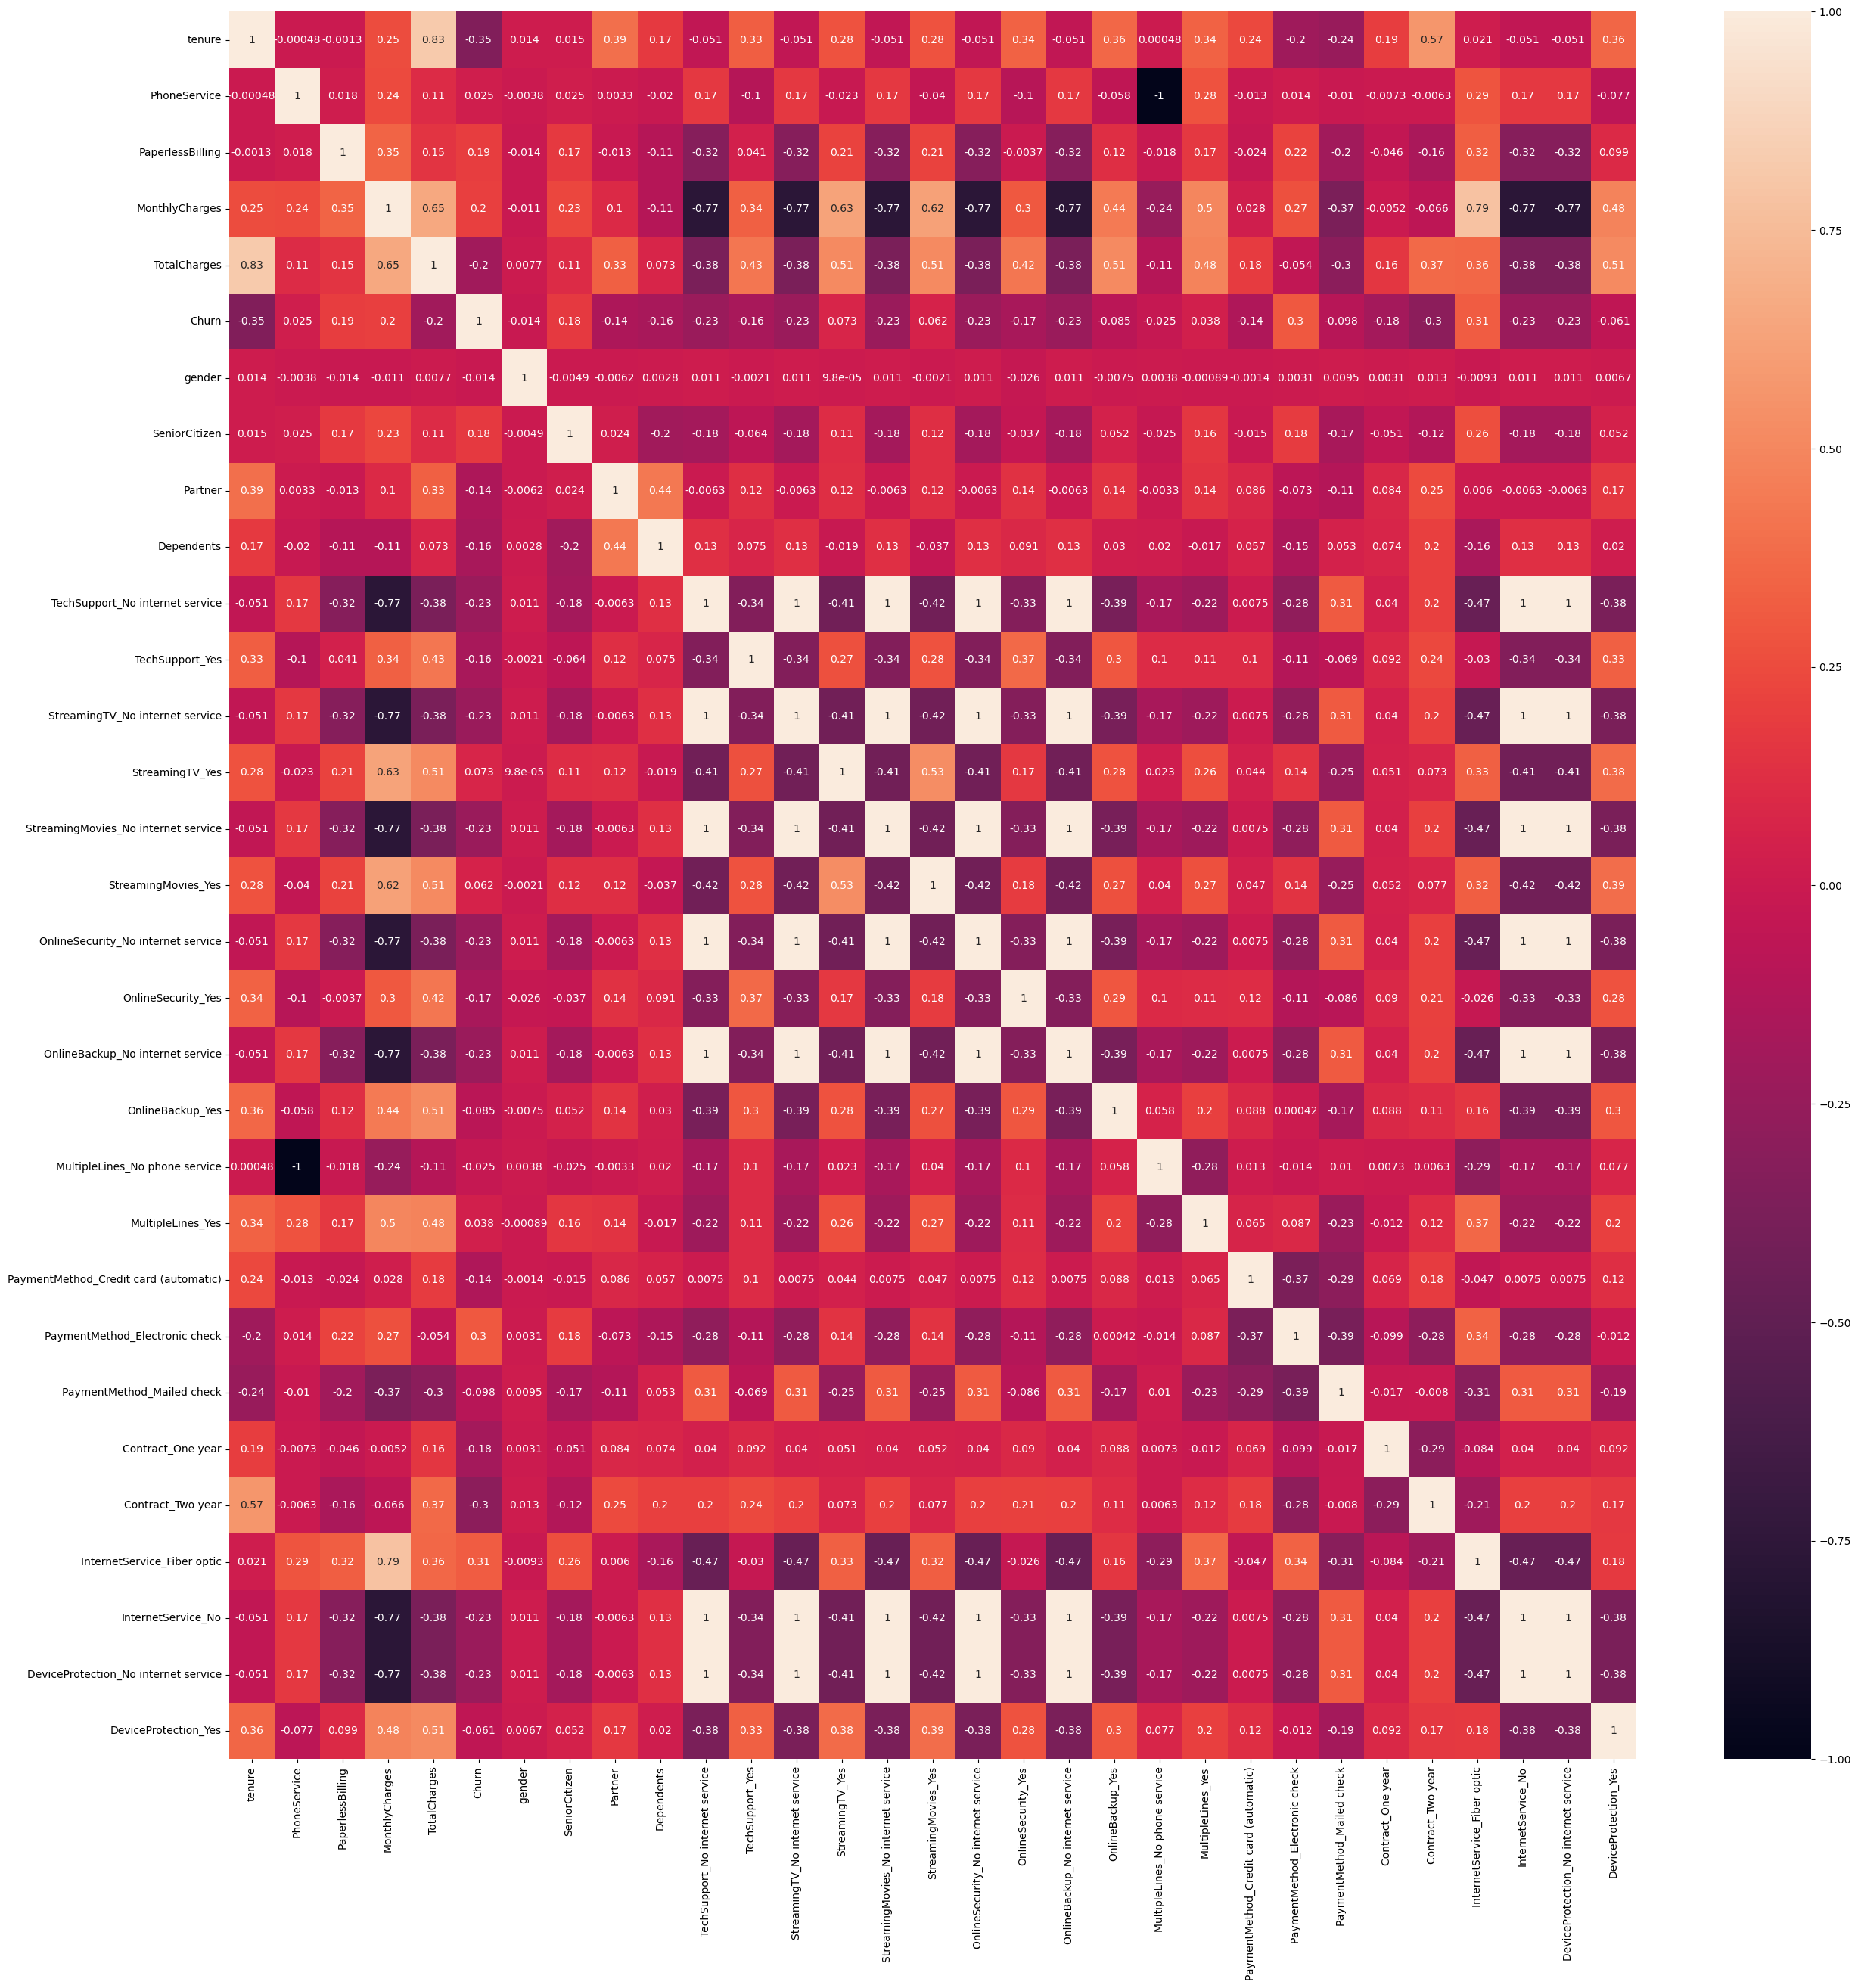

In [60]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot=True)

In [61]:
y_train = df_train.pop('Churn')

X_train = df_train

In [62]:
X_train_lm = sm.add_constant(X_train)

lr = sm.GLM(y_train, X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Gaussian   Df Model:                           23
Link Function:               Identity   Scale:                         0.13753
Method:                          IRLS   Log-Likelihood:                -2089.6
Date:                Fri, 02 Aug 2024   Deviance:                       673.63
Time:                        14:33:55   Pearson chi2:                     674.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3357
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -1.867e+11   3.73e+11     -0.500      0.617   -9.18e+11    5.45e+11
tenure                                   -0.1269      0.042     -2.998      0.003      -0.210      -0.044
PhoneService                           1.867e+11   3.73e+11      0.500      0.617   -5.45e+11    9.18e+11
PaperlessBilling                          0.0413      0.012      3.487      0.000       0.018       0.064
MonthlyCharges                           -0.5889      0.523     -1.125      0.260      -1.615       0.437
TotalCharges                             -0.4326      0.067     -6.493      0.000      -0.563      -0.302
gender                                   -0.0055      0.011     -0.518      0.604      -0.026       0.015
SeniorCitizen                             0.0757      0.015      4.896      0.000       0.045       0.106
Partner                                   0.0045      0.013      0.352      0.725      -0.020       0.029
Dependents                               -0.0183      0.013     -1.363      0.173      -0.045       0.008
TechSupport_No internet service          -0.0450      0.019     -2.383      0.017      -0.082      -0.008
TechSupport_Yes                          -0.0229      0.030     -0.774      0.439      -0.081       0.035
StreamingTV_No internet service          -0.0454      0.019     -2.403      0.016      -0.082      -0.008
StreamingTV_Yes                           0.1194      0.054      2.223      0.026       0.014       0.225
StreamingMovies_No internet service      -0.0451      0.019     -2.390      0.017      -0.082      -0.008
StreamingMovies_Yes                       0.1013      0.054      1.887      0.059      -0.004       0.206
OnlineSecurity_No internet service       -0.0453      0.019     -2.399      0.016      -0.082      -0.008
OnlineSecurity_Yes                       -0.0138      0.030     -0.466      0.641      -0.072       0.044
OnlineBackup_No internet service         -0.0452      0.019     -2.393      0.017      -0.082      -0.008
OnlineBackup_Yes                          0.0085      0.029      0.292      0.770      -0.048       0.065
MultipleLines_No phone service         1.867e+11   3.73e+11      0.500      0.617   -5.45e+11    9.18e+11
MultipleLines_Yes                         0.0749      0.029      2.584      0.010       0.018       0.132
PaymentMethod_Credit card (automatic)    -0.0244      0.016     -1.523      0.128      -0.056       0.007
PaymentMethod_Electronic check            0.0483      0.016      3.062      0.002       0.017       0.079
PaymentMethod_Mailed check               -0.0283      0.017     -1.654      0.098      -0.062       0.005
Contract_One year                        -0.1027      0.016     -6.273      0.000      -0.135      -0.071
Contract_

- There are a lot of columns which have a high p value

In [63]:
# RFE

lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm , n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 14),
 ('TotalCharges', True, 1),
 ('gender', False, 13),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 15),
 ('Dependents', False, 11),
 ('TechSupport_No internet service', True, 1),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_No internet service', True, 1),
 ('StreamingTV_Yes', False, 2),
 ('StreamingMovies_No internet service', False, 5),
 ('StreamingMovies_Yes', False, 7),
 ('OnlineSecurity_No internet service', False, 12),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_No internet service', True, 1),
 ('OnlineBackup_Yes', False, 9),
 ('MultipleLines_No phone service', False, 10),
 ('MultipleLines_Yes', False, 4),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 6),
 ('PaymentMethod_Mailed check', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('Inte

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic'],
      dtype='object')

In [66]:
X_train_one = X_train[col]

In [67]:
X_train_rfe1 = sm.add_constant(X_train_one)

lr1 = sm.GLM(y_train, X_train_rfe1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                         0.13921
Method:                          IRLS   Log-Likelihood:                -2124.4
Date:                Fri, 02 Aug 2024   Deviance:                       683.22
Time:                        14:33:55   Pearson chi2:                     683.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3230
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4360      0.023     19.128      0.000       0.391       0.481
tenure                                   -0.1988      0.040     -4.960      0.000      -0.277      -0.120
PhoneService                             -0.0107      0.021     -0.517      0.605      -0.051       0.030
PaperlessBilling                          0.0502      0.012      4.240      0.000       0.027       0.073
TotalCharges                             -0.2593      0.056     -4.603      0.000      -0.370      -0.149
SeniorCitizen                             0.0856      0.015      5.605      0.000       0.056       0.115
TechSupport_No internet service          -0.0619      0.007     -9.061      0.000      -0.075      -0.048
TechSupport_Yes                          -0.0535      0.014     -3.713      0.000      -0.082      -0.025
StreamingTV_No internet service          -0.0619      0.007     -9.061      0.000      -0.075      -0.048
OnlineSecurity_Yes                       -0.0595      0.014     -4.184      0.000      -0.087      -0.032
OnlineBackup_No internet service         -0.0619      0.007     -9.061      0.000      -0.075      -0.048
PaymentMethod_Credit card (automatic)    -0.0537      0.014     -3.857      0.000      -0.081      -0.026
PaymentMethod_Mailed check               -0.0682      0.015     -4.611      0.000      -0.097      -0.039
Contract_One year                        -0.1040      0.016     -6.375      0.000      -0.136      -0.072
Contract_Two year                        -0.0493      0.020     -2.457      0.014      -0.089      -0.010
InternetService_Fiber optic               0.1882      0.016     11.497      0.000       0.156       0.220
=========================================================================================================
"""

In [68]:
X_train_glm_bino = sm.add_constant(X_train_one)

lr_glm = sm.GLM(y_train, X_train_glm_bino, family=sm.families.Binomial()).fit()

lr_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.4
Date:                Fri, 02 Aug 2024   Deviance:                       4036.8
Time:                        14:33:55   Pearson chi2:                 6.54e+03
No. Iterations:                    12   Pseudo R-squ. (CS):             0.2804
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3502      0.166      2.105      0.035       0.024       0.676
tenure                                   -4.8547      0.524     -9.273      0.000      -5.881      -3.829
PhoneService                             -0.5231      0.158     -3.302      0.001      -0.834      -0.213
PaperlessBilling                          0.3638      0.089      4.073      0.000       0.189       0.539
TotalCharges                              3.5915      0.681      5.276      0.000       2.257       4.926
SeniorCitizen                             0.4394      0.099      4.443      0.000       0.246       0.633
TechSupport_No internet service          -0.3307      0.055     -5.995      0.000      -0.439      -0.223
TechSupport_Yes                          -0.3921      0.101     -3.877      0.000      -0.590      -0.194
StreamingTV_No internet service          -0.3307      0.055     -5.995      0.000      -0.439      -0.223
OnlineSecurity_Yes                       -0.4309      0.101     -4.246      0.000      -0.630      -0.232
OnlineBackup_No internet service         -0.3307      0.055     -5.995      0.000      -0.439      -0.223
PaymentMethod_Credit card (automatic)    -0.3885      0.112     -3.462      0.001      -0.609      -0.169
PaymentMethod_Mailed check               -0.4164      0.110     -3.773      0.000      -0.633      -0.200
Contract_One year                        -0.6737      0.127     -5.305      0.000      -0.923      -0.425
Contract_Two year                        -1.2736      0.212     -6.020      0.000      -1.688      -0.859
InternetService_Fiber optic               0.7683      0.117      6.549      0.000       0.538       0.998
=========================================================================================================
"""

- the p values look somewhat desirable, we can start predicting

In [69]:
y_train_pred = lr_glm.predict(X_train_glm_bino)
y_train_pred

879     0.211685
5790    0.246670
6498    0.728194
880     0.486341
2784    0.626770
          ...   
79      0.012427
3934    0.117580
5964    0.045981
6947    0.131690
5649    0.029323
Length: 4922, dtype: float64

In [70]:
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_prob': y_train_pred})
y_train_pred_final.head(5)

,Churn,Churn_prob
879,0,0.211685
5790,0,0.246670
6498,1,0.728194
880,1,0.486341
2784,1,0.626770


In [71]:
# Checking if the churn values match, let's keep the threshold at 0.45

y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x : 1 if x > 0.45 else 0)
y_train_pred_final.head(5)

,Churn,Churn_prob,Predicted
879,0,0.211685,0
5790,0,0.246670,0
6498,1,0.728194,1
880,1,0.486341,1
2784,1,0.626770,1


- The prediction works correctly for the displayed values

In [72]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)
confusion

array([[3169,  466],
       [ 501,  786]])

<Axes: >

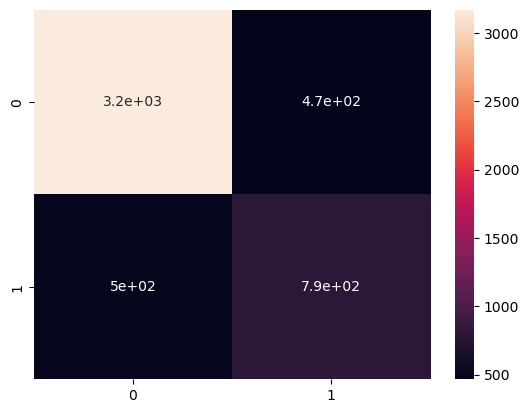

In [73]:
sns.heatmap(confusion, annot=True)

In [74]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.8035351483136937


- on the current model we got an accuracy of 80%. Let's try to see if we can improve the model even further

In [75]:
a = X_train_glm_bino.drop('const', axis=1)

In [76]:
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
5,TechSupport_No internet service,inf
7,StreamingTV_No internet service,inf
9,OnlineBackup_No internet service,inf
0,tenure,15.27
3,TotalCharges,13.52
1,PhoneService,7.41
14,InternetService_Fiber optic,4.02
13,Contract_Two year,3.40
2,PaperlessBilling,2.62
6,TechSupport_Yes,2.09


- TechSupport_No internet service, StreamingTV_No internet service, OnlineBackup_No internet service are weirdly correlated. Let's try dropping one column and if the result still remains the same, then we will drop the remaining two rows as well

In [77]:
X_train_glm_bino = X_train_glm_bino.drop('TechSupport_No internet service', axis = 1)

In [78]:
X_train_glm_bino1 = sm.add_constant(X_train_glm_bino)

lr_glm1 = sm.GLM(y_train, X_train_glm_bino1, family=sm.families.Binomial()).fit()

lr_glm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.4
Date:                Fri, 02 Aug 2024   Deviance:                       4036.8
Time:                        14:33:55   Pearson chi2:                 6.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2804
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3502      0.166      2.105      0.035       0.024       0.676
tenure                                   -4.8547      0.524     -9.273      0.000      -5.881      -3.829
PhoneService                             -0.5231      0.158     -3.302      0.001      -0.834      -0.213
PaperlessBilling                          0.3638      0.089      4.073      0.000       0.189       0.539
TotalCharges                              3.5915      0.681      5.276      0.000       2.257       4.926
SeniorCitizen                             0.4394      0.099      4.443      0.000       0.246       0.633
TechSupport_Yes                          -0.3921      0.101     -3.877      0.000      -0.590      -0.194
StreamingTV_No internet service          -0.4960      0.083     -5.995      0.000      -0.658      -0.334
OnlineSecurity_Yes                       -0.4309      0.101     -4.246      0.000      -0.630      -0.232
OnlineBackup_No internet service         -0.4960      0.083     -5.995      0.000      -0.658      -0.334
PaymentMethod_Credit card (automatic)    -0.3885      0.112     -3.462      0.001      -0.609      -0.169
PaymentMethod_Mailed check               -0.4164      0.110     -3.773      0.000      -0.633      -0.200
Contract_One year                        -0.6737      0.127     -5.305      0.000      -0.923      -0.425
Contract_Two year                        -1.2736      0.212     -6.020      0.000      -1.688      -0.859
InternetService_Fiber optic               0.7683      0.117      6.549      0.000       0.538       0.998
=========================================================================================================
"""

In [79]:
b = X_train_glm_bino1.drop('const', axis = 1)

In [80]:
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
6,StreamingTV_No internet service,inf
8,OnlineBackup_No internet service,inf
0,tenure,15.27
3,TotalCharges,13.52
1,PhoneService,7.41
13,InternetService_Fiber optic,4.02
12,Contract_Two year,3.40
2,PaperlessBilling,2.62
5,TechSupport_Yes,2.09
11,Contract_One year,2.02


In [81]:
X_train_glm_bino1 = X_train_glm_bino1.drop(['StreamingTV_No internet service', 'OnlineBackup_No internet service'], axis=1)

In [82]:
X_train_glm_bino1.head(1)

,const,tenure,PhoneService,PaperlessBilling,TotalCharges,SeniorCitizen,TechSupport_Yes,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic
879,1.0,0.450704,1,1,0.189979,0,0,0,0,0,0,0,0


In [83]:
X_train_glm_bino2 = sm.add_constant(X_train_glm_bino1)

lr_glm2 = sm.GLM(y_train, X_train_glm_bino2, family=sm.families.Binomial()).fit()

lr_glm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2037.4
Date:                Fri, 02 Aug 2024   Deviance:                       4074.9
Time:                        14:33:55   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2748
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3435      0.166      2.067      0.039       0.018       0.669
tenure                                   -5.1698      0.508    -10.172      0.000      -6.166      -4.174
PhoneService                             -0.8609      0.151     -5.708      0.000      -1.157      -0.565
PaperlessBilling                          0.4265      0.088      4.822      0.000       0.253       0.600
TotalCharges                              4.0375      0.656      6.153      0.000       2.751       5.324
SeniorCitizen                             0.4547      0.099      4.599      0.000       0.261       0.648
TechSupport_Yes                          -0.2748      0.101     -2.724      0.006      -0.472      -0.077
OnlineSecurity_Yes                       -0.3271      0.102     -3.222      0.001      -0.526      -0.128
PaymentMethod_Credit card (automatic)    -0.4105      0.112     -3.674      0.000      -0.630      -0.192
PaymentMethod_Mailed check               -0.5410      0.108     -5.015      0.000      -0.752      -0.330
Contract_One year                        -0.7470      0.126     -5.949      0.000      -0.993      -0.501
Contract_Two year                        -1.4243      0.208     -6.832      0.000      -1.833      -1.016
InternetService_Fiber optic               1.0274      0.111      9.224      0.000       0.809       1.246
=========================================================================================================
"""

In [84]:
c = X_train_glm_bino2.drop('const', axis = 1)

In [85]:
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,tenure,14.02
3,TotalCharges,11.87
1,PhoneService,5.55
11,InternetService_Fiber optic,3.80
10,Contract_Two year,3.23
2,PaperlessBilling,2.57
9,Contract_One year,1.96
5,TechSupport_Yes,1.94
6,OnlineSecurity_Yes,1.83
8,PaymentMethod_Mailed check,1.57


- The VIF values have seem to come down a bit, let's dropping tenure

In [86]:
X_train_glm_bino2 = X_train_glm_bino2.drop('tenure', axis= 1)

In [87]:
X_train_glm_bino3 = sm.add_constant(X_train_glm_bino2)

lr_glm3 = sm.GLM(y_train, X_train_glm_bino3, family=sm.families.Binomial()).fit()

lr_glm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2103.3
Date:                Fri, 02 Aug 2024   Deviance:                       4206.7
Time:                        14:33:56   Pearson chi2:                 5.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2551
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4709      0.144     -3.277      0.001      -0.753      -0.189
PhoneService                             -0.5728      0.140     -4.098      0.000      -0.847      -0.299
PaperlessBilling                          0.4250      0.087      4.889      0.000       0.255       0.595
TotalCharges                             -2.2598      0.233     -9.694      0.000      -2.717      -1.803
SeniorCitizen                             0.4409      0.098      4.493      0.000       0.249       0.633
TechSupport_Yes                          -0.1034      0.099     -1.041      0.298      -0.298       0.091
OnlineSecurity_Yes                       -0.2597      0.101     -2.571      0.010      -0.458      -0.062
PaymentMethod_Credit card (automatic)    -0.4719      0.110     -4.277      0.000      -0.688      -0.256
PaymentMethod_Mailed check               -0.3985      0.105     -3.794      0.000      -0.604      -0.193
Contract_One year                        -0.9917      0.120     -8.252      0.000      -1.227      -0.756
Contract_Two year                        -1.9189      0.194     -9.889      0.000      -2.299      -1.539
InternetService_Fiber optic               1.4978      0.103     14.559      0.000       1.296       1.699
=========================================================================================================
"""

In [88]:
d = X_train_glm_bino3.drop('const', axis = 1)

In [89]:
vif = pd.DataFrame()
vif['Features'] = d.columns
vif['VIF'] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,TotalCharges,5.04
0,PhoneService,5.01
10,InternetService_Fiber optic,3.41
1,PaperlessBilling,2.54
9,Contract_Two year,2.42
4,TechSupport_Yes,1.90
5,OnlineSecurity_Yes,1.82
8,Contract_One year,1.74
7,PaymentMethod_Mailed check,1.57
6,PaymentMethod_Credit card (automatic),1.46


- The other values drop drastically post dropping tenure. Let's now test the accuracy again

In [90]:
y_train_pred1 = lr_glm3.predict(X_train_glm_bino3)
y_train_pred1

879     0.259618
5790    0.360770
6498    0.703201
880     0.561906
2784    0.663142
          ...   
79      0.083581
3934    0.088946
5964    0.100615
6947    0.087451
5649    0.166341
Length: 4922, dtype: float64

In [91]:
y_train_pred_final1 = pd.DataFrame({'Churn': y_train.values, 'Churn_prob': y_train_pred1})
y_train_pred_final1.head(5)

,Churn,Churn_prob
879,0,0.259618
5790,0,0.360770
6498,1,0.703201
880,1,0.561906
2784,1,0.663142


In [92]:
# Checking if the churn values match, let's keep the threshold at 0.45

y_train_pred_final1['Predicted'] = y_train_pred_final1.Churn_prob.map(lambda x : 1 if x > 0.45 else 0)
y_train_pred_final1.head(5)

,Churn,Churn_prob,Predicted
879,0,0.259618,0
5790,0,0.360770,0
6498,1,0.703201,1
880,1,0.561906,1
2784,1,0.663142,1


In [93]:
confusion1 = metrics.confusion_matrix(y_train_pred_final1.Churn, y_train_pred_final1.Predicted)
confusion1

array([[3163,  472],
       [ 528,  759]])

In [94]:
print(metrics.accuracy_score(y_train_pred_final1.Churn, y_train_pred_final1.Predicted))

0.7968305566842747


- The accuracy remains somewhat the same. Will drop dropping one column after which won't make any further modifications

In [95]:
X_train_glm_bino4 = X_train_glm_bino3.drop('TotalCharges', axis = 1)

In [96]:
X_train_glm_bino4 = sm.add_constant(X_train_glm_bino4)

lr_glm4 = sm.GLM(y_train, X_train_glm_bino4, family=sm.families.Binomial()).fit()

lr_glm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2152.7
Date:                Fri, 02 Aug 2024   Deviance:                       4305.5
Time:                        14:33:56   Pearson chi2:                 5.08e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2400
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4771      0.144     -3.322      0.001      -0.759      -0.196
PhoneService                             -0.5709      0.141     -4.042      0.000      -0.848      -0.294
PaperlessBilling                          0.3632      0.086      4.235      0.000       0.195       0.531
SeniorCitizen                             0.3182      0.095      3.364      0.001       0.133       0.504
TechSupport_Yes                          -0.3005      0.096     -3.128      0.002      -0.489      -0.112
OnlineSecurity_Yes                       -0.4770      0.097     -4.906      0.000      -0.668      -0.286
PaymentMethod_Credit card (automatic)    -0.5231      0.109     -4.805      0.000      -0.737      -0.310
PaymentMethod_Mailed check               -0.2795      0.104     -2.694      0.007      -0.483      -0.076
Contract_One year                        -1.4583      0.112    -13.028      0.000      -1.678      -1.239
Contract_Two year                        -2.5763      0.185    -13.939      0.000      -2.939      -2.214
InternetService_Fiber optic               1.0969      0.093     11.739      0.000       0.914       1.280
=========================================================================================================
"""

In [97]:
e = X_train_glm_bino4.drop('const', axis = 1)

In [98]:
vif = pd.DataFrame()
vif['Features'] = e.columns
vif['VIF'] = [variance_inflation_factor(e.values, i) for i in range(e.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,PhoneService,5.00
9,InternetService_Fiber optic,2.63
1,PaperlessBilling,2.52
8,Contract_Two year,1.78
3,TechSupport_Yes,1.74
4,OnlineSecurity_Yes,1.65
6,PaymentMethod_Mailed check,1.53
7,Contract_One year,1.49
5,PaymentMethod_Credit card (automatic),1.46
2,SeniorCitizen,1.30


In [99]:
y_train_pred2 = lr_glm4.predict(X_train_glm_bino4)
y_train_pred2

879     0.335177
5790    0.471534
6498    0.601565
880     0.409610
2784    0.527834
          ...   
79      0.064990
3934    0.047762
5964    0.138765
6947    0.172291
5649    0.209565
Length: 4922, dtype: float64

In [100]:
y_train_pred_final2 = pd.DataFrame({'Churn': y_train.values, 'Churn_prob': y_train_pred2})
y_train_pred_final2.head(5)

,Churn,Churn_prob
879,0,0.335177
5790,0,0.471534
6498,1,0.601565
880,1,0.409610
2784,1,0.527834


In [101]:
# Checking if the churn values match, let's keep the threshold at 0.45

y_train_pred_final2['Predicted'] = y_train_pred_final2.Churn_prob.map(lambda x : 1 if x > 0.45 else 0)
y_train_pred_final2.head(5)

,Churn,Churn_prob,Predicted
879,0,0.335177,0
5790,0,0.471534,1
6498,1,0.601565,1
880,1,0.409610,0
2784,1,0.527834,1


- There seems to be some disparity in the predicted and the actual values

In [102]:
print(metrics.accuracy_score(y_train_pred_final2.Churn, y_train_pred_final2.Predicted))

0.782608695652174


In [103]:
confusion1 = metrics.confusion_matrix(y_train_pred_final2.Churn, y_train_pred_final2.Predicted)
confusion1

array([[3072,  563],
       [ 507,  780]])

In [104]:
TP = confusion1[1,1]
TN = confusion1[0,0]
FN = confusion1[1,0]
FP = confusion1[0,1]

In [105]:
sensitivity = (TP/(TP+FN))
sensitivity

0.6060606060606061

- As one can notice, the accuracy is 78% which might seem good, but the sensitivity is only 60% which means that only 60% of the correct values are being flagged as correct

In [106]:
specificity = (TN/(TN+FP))
specificity

0.8451169188445667

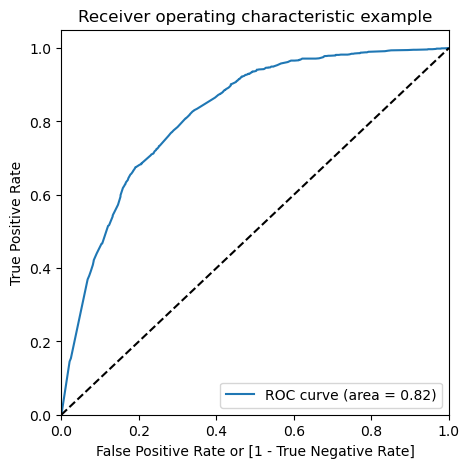

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final2.Churn, y_train_pred_final2.Churn_prob)

- Ideally, the curve should be as far as possible from the diagonal line. In our case, it looks good but it could be better

In [117]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming y_train_pred_final2 is defined and has 'Churn' and 'pred_prob' columns
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

# Define the cutoffs
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    # Generate predictions based on the current cutoff
    y_train_pred_final2['predicted'] = y_train_pred_final2['Churn_prob'].apply(lambda x: 1 if x > i else 0)
    
    # Compute the confusion matrix
    cm1 = confusion_matrix(y_train_pred_final2['Churn'], y_train_pred_final2['predicted'])
    
    # Calculate metrics
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    
    # Store the results in the DataFrame
    cutoff_df.loc[len(cutoff_df)] = [i, accuracy, sensi, speci]

print(cutoff_df)


   prob  accuracy     sensi     speci
0   0.0  0.261479  1.000000  0.000000
1   0.1  0.592239  0.946387  0.466850
2   0.2  0.664567  0.875680  0.589821
3   0.3  0.745022  0.727273  0.751307
4   0.4  0.778952  0.649573  0.824759
5   0.5  0.784437  0.515152  0.879780
6   0.6  0.785047  0.369075  0.932325
7   0.7  0.738521  0.000000  1.000000
8   0.8  0.738521  0.000000  1.000000
9   0.9  0.738521  0.000000  1.000000


<Axes: xlabel='prob'>

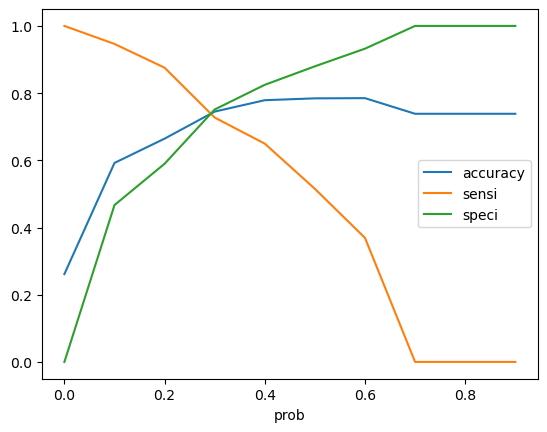

In [118]:
cutoff_df.plot.line(x="prob", y=["accuracy", "sensi", "speci"])

- From the above, the cut-off point seems to be 0.35. So we will take this value and model our predictions

In [119]:
# Checking if the churn values match, let's keep the threshold at 0.45

y_train_pred_final2['Predicted'] = y_train_pred_final2.Churn_prob.map(lambda x : 1 if x > 0.35 else 0)
y_train_pred_final2.head(5)

,Churn,Churn_prob,Predicted,predicted
879,0,0.335177,0,0
5790,0,0.471534,1,0
6498,1,0.601565,1,0
880,1,0.409610,1,0
2784,1,0.527834,1,0


In [129]:
y_train_pred_final2 = y_train_pred_final2.drop(['Predicted'], axis = 1)

In [122]:
y_train_pred_final2['Predicted'] = y_train_pred_final2.Churn_prob.map(lambda x : 1 if x > 0.35 else 0)
y_train_pred_final2.head(10)

,Churn,Churn_prob,Predicted
879,0,0.335177,0
5790,0,0.471534,1
6498,1,0.601565,1
880,1,0.409610,1
2784,1,0.527834,1
3874,0,0.335177,0
5387,0,0.314820,0
6623,1,0.674854,1
4465,0,0.171884,0
5364,1,0.472247,1


In [123]:
print(metrics.accuracy_score(y_train_pred_final2.Churn, y_train_pred_final2.Predicted))

0.7685900040633888


In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final2.Churn, y_train_pred_final2.Predicted)
confusion2

array([[2907,  728],
       [ 411,  876]])

In [125]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FN = confusion2[1,0]
FP = confusion2[0,1]

In [126]:
sensitivity1 = (TP/(TP+FN))
sensitivity1

0.6806526806526807

In [128]:
specificity1 = (TN/(TN+FP))
specificity1

0.7997248968363136

In [130]:
y_train_pred_final2['Predicted'] = y_train_pred_final2.Churn_prob.map(lambda x : 1 if x > 0.3 else 0)
y_train_pred_final2.head(10)

,Churn,Churn_prob,Predicted
879,0,0.335177,1
5790,0,0.471534,1
6498,1,0.601565,1
880,1,0.409610,1
2784,1,0.527834,1
3874,0,0.335177,1
5387,0,0.314820,1
6623,1,0.674854,1
4465,0,0.171884,0
5364,1,0.472247,1


In [131]:
print(metrics.accuracy_score(y_train_pred_final2.Churn, y_train_pred_final2.Predicted))

0.7450223486387647


In [132]:
confusion3 = metrics.confusion_matrix(y_train_pred_final2.Churn, y_train_pred_final2.Predicted)
confusion3

array([[2731,  904],
       [ 351,  936]])

In [133]:
TP = confusion3[1,1]
TN = confusion3[0,0]
FN = confusion3[1,0]
FP = confusion3[0,1]

In [134]:
sensitivity2 = (TP/(TP+FN))
sensitivity2

0.7272727272727273

In [135]:
specificity2 = (TN/(TN+FP))
specificity2

0.7513067400275103

In [136]:
# Precision

(TP)/(TP+FP)

0.508695652173913

In [137]:
# Recall

(TP)/(TP+FN)

0.7272727272727273

In [139]:
precision_score(y_train_pred_final2.Churn, y_train_pred_final2.Predicted)

0.508695652173913

In [140]:
recall_score(y_train_pred_final2.Churn, y_train_pred_final2.Predicted)

0.7272727272727273

#### Plotting the precision-recall tradeoff curve

In [146]:
p1, r1, thresholds1 = precision_recall_curve(y_train_pred_final2.Churn, y_train_pred_final2.Churn_prob)

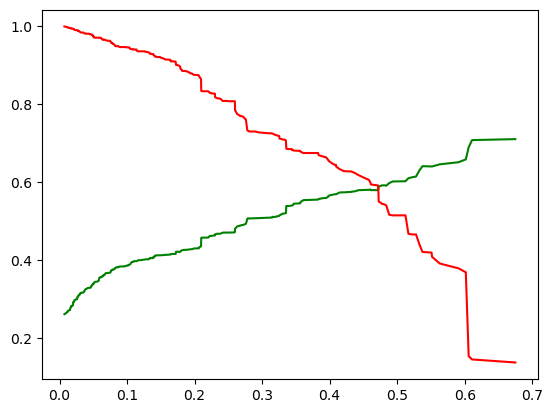

In [148]:
plt.plot(thresholds1, p1[:-1], "g-")
plt.plot(thresholds1, r1[:-1], "r-")

#### Time to predict the accuracy on the test set

In [149]:
df_test

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes
942,24,1,1,79.85,2001.00,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3730,57,1,1,104.50,5921.35,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1
1761,58,1,1,24.45,1513.60,0,1,0,0,0,...,1,1,0,0,0,1,0,1,1,0
2283,1,1,1,71.55,71.55,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1872,41,1,0,19.70,804.25,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,63,1,0,68.80,4111.35,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3508,70,1,1,113.65,7939.25,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
6765,69,1,1,25.60,1673.40,0,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
3598,1,1,0,46.30,46.30,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [150]:
X_train_glm_bino4

,const,PhoneService,PaperlessBilling,SeniorCitizen,TechSupport_Yes,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic
879,1.0,1,1,0,0,0,0,0,0,0,0
5790,1.0,0,1,0,0,0,0,0,0,0,0
6498,1.0,1,1,0,0,0,0,0,0,0,1
880,1.0,1,1,0,1,1,0,0,0,0,1
2784,1.0,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
79,1.0,1,1,0,0,0,1,0,1,0,0
3934,1.0,0,0,0,1,1,0,1,1,0,0
5964,1.0,1,0,0,1,1,0,0,0,0,0
6947,1.0,1,1,0,0,0,1,0,1,0,1


In [151]:
set(df_test.columns) - set(X_train_glm_bino4.columns)

{'Churn',
 'Dependents',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'InternetService_No',
 'MonthlyCharges',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'OnlineSecurity_No internet service',
 'Partner',
 'PaymentMethod_Electronic check',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'TechSupport_No internet service',
 'TotalCharges',
 'gender',
 'tenure'}

In [152]:
cols_to_drop = [
 'Dependents',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'InternetService_No',
 'MonthlyCharges',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'OnlineSecurity_No internet service',
 'Partner',
 'PaymentMethod_Electronic check',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'TechSupport_No internet service',
 'TotalCharges',
 'gender',
 'tenure'
 ]

In [153]:
df_test = df_test.drop(cols_to_drop, axis = 1)

In [154]:
y_test = df_test.pop('Churn')
X_test = df_test

In [163]:
X_test.head(2)

,PhoneService,PaperlessBilling,SeniorCitizen,TechSupport_Yes,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic
942,1,1,0,0,0,1,0,0,0,1
3730,1,1,0,0,0,1,0,0,0,1


- No need to perform any scaling as the values are already in the range 

In [165]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head(2)

,const,PhoneService,PaperlessBilling,SeniorCitizen,TechSupport_Yes,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic
942,1.0,1,1,0,0,0,1,0,0,0,1
3730,1.0,1,1,0,0,0,1,0,0,0,1


In [166]:
y_test_pred = lr_glm4.predict(X_test_sm)

In [170]:
y_test_pred_final = pd.DataFrame({'Churn': y_test.values, 'Churn_prob': y_test_pred})
y_test_pred_final.head(5)

,Churn,Churn_prob
942,0,0.472247
3730,1,0.472247
1761,0,0.022221
2283,1,0.533066
1872,0,0.025976


In [171]:
# Checking if the churn values match, let's keep the threshold at 0.45

y_test_pred_final['Predicted'] = y_test_pred_final.Churn_prob.map(lambda x : 1 if x > 0.3 else 0)
y_test_pred_final.head(5)

,Churn,Churn_prob,Predicted
942,0,0.472247,1
3730,1,0.472247,1
1761,0,0.022221,0
2283,1,0.533066,1
1872,0,0.025976,0


In [172]:
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Predicted))

0.7364928909952607


In [173]:
confusion4 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)
confusion4

array([[1133,  395],
       [ 161,  421]])

In [174]:
TP = confusion4[1,1]
TN = confusion4[0,0]
FN = confusion4[1,0]
FP = confusion4[0,1]

In [176]:
sensitivity3 = (TP/(TP+FN))
sensitivity3

0.7233676975945017

In [177]:
specificity3 = (TN/(TN+FP))
specificity3

0.7414921465968587

- From the above values of sensitivity and specificity, which are pretty similar to the values on the train set, we can conclude that the model lr_glm4 performs well